# Homework1: Softmax for MNIST Classification

### In this homework, you need to
- ### implement and apply a softmax classifier to perform digits classification.

In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load MNIST Dataset

In [2]:
from torchvision import datasets, transforms

train_set = datasets.MNIST(root='./MNIST_data/', train=True, download=True, transform=transforms.ToTensor())
test_set = datasets.MNIST(root='./MNIST_data/', train=False, download=True, transform=transforms.ToTensor())
train_size = len(train_set)
test_size = len(test_set)
print('Training dataset size: ', train_size)
print('Test dataset size: ', test_size)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.50MB/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.98MB/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw

Training dataset size:  60000
Test dataset size:  10000


## Data Example
To have a better understand of MNIST dataset, we can visualize some examples in MNIST.

5


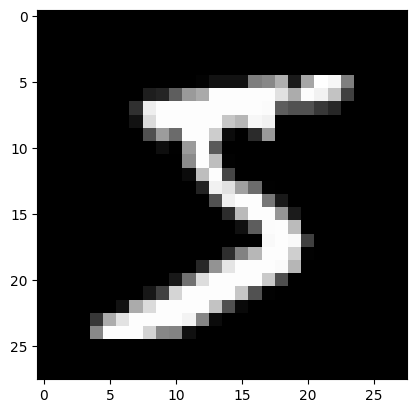

In [3]:
example_id = 0
image, label = train_set[example_id]
plt.imshow(image.squeeze().numpy(), cmap='gray')
print(label)

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [4]:
batch_size = 100
max_epoch = 10
learning_rate = 0.01

# For regularization
_lambda = 0.5

### TODO
Before executing the following code, you should accomplish **./softmax_classifier.py**. After completing it, the Train code module can only be run correctly.

In [5]:
%load_ext autoreload
%autoreload 2
"""%load_ext autoreload
加载 autoreload 这个扩展模块。

%autoreload 2
让 Notebook 在每次运行代码单元时，自动重新加载你导入的 Python 文件（比如你修改了 softmax_classifier.py，不用重启 kernel 就能生效）"""

from softmax_classifier import softmax_classifier

## Train

In [6]:
from torch.utils.data import DataLoader

def to_one_hot(labels, num_classes=10):
    return np.eye(num_classes)[labels]

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

W = np.random.randn(28*28, 10) * 0.001

loss_set = []
accu_set = []
disp_freq = 100

for epoch in range(max_epoch):
    for batch_id, (images, labels) in enumerate(train_loader):
        # images: [batch, 1, 28, 28] -> [batch, 784]
        input = images.view(images.size(0), -1).numpy()
        label = to_one_hot(labels.numpy(), num_classes=10)

        loss, gradient, prediction = softmax_classifier(W, input, label, _lambda)
        label_scalar = np.argmax(label, axis=1)
        accuracy = np.mean(prediction == label_scalar)

        loss_set.append(loss)
        accu_set.append(accuracy)

        W = W - (learning_rate * gradient)
        if batch_id % disp_freq == 0:
            print("Epoch [{}][{}]\t Batch [{}][{}]\t Training Loss {:.4f}\t Accuracy {:.4f}".format(
                epoch, max_epoch, batch_id, len(train_loader), loss, accuracy))
    print()

Epoch [0][10]	 Batch [0][600]	 Training Loss 2.3067	 Accuracy 0.1400
Epoch [0][10]	 Batch [100][600]	 Training Loss 1.8444	 Accuracy 0.7100
Epoch [0][10]	 Batch [200][600]	 Training Loss 1.7837	 Accuracy 0.7600
Epoch [0][10]	 Batch [300][600]	 Training Loss 1.7148	 Accuracy 0.7200
Epoch [0][10]	 Batch [400][600]	 Training Loss 1.6989	 Accuracy 0.8200
Epoch [0][10]	 Batch [500][600]	 Training Loss 1.7019	 Accuracy 0.7800

Epoch [1][10]	 Batch [0][600]	 Training Loss 1.6599	 Accuracy 0.8200
Epoch [1][10]	 Batch [100][600]	 Training Loss 1.6807	 Accuracy 0.8200
Epoch [1][10]	 Batch [200][600]	 Training Loss 1.6226	 Accuracy 0.8200
Epoch [1][10]	 Batch [300][600]	 Training Loss 1.8537	 Accuracy 0.7100
Epoch [1][10]	 Batch [400][600]	 Training Loss 1.6887	 Accuracy 0.8500
Epoch [1][10]	 Batch [500][600]	 Training Loss 1.5959	 Accuracy 0.8300

Epoch [2][10]	 Batch [0][600]	 Training Loss 1.7120	 Accuracy 0.7400
Epoch [2][10]	 Batch [100][600]	 Training Loss 1.7016	 Accuracy 0.7900
Epoch [2][

## Test

In [7]:
from torch.utils.data import DataLoader

def to_one_hot(labels, num_classes=10):
    return np.eye(num_classes)[labels]

test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

correct = 0
total = 0

for images, labels in test_loader:
    input = images.view(images.size(0), -1).numpy()
    label_onehot = to_one_hot(labels.numpy(), num_classes=10)
    _, _, prediction = softmax_classifier(W, input, label_onehot, _lambda)
    label_scalar = np.argmax(label_onehot, axis=1)
    correct += np.sum(prediction == label_scalar)
    total += labels.size(0)

accuracy = correct / total
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.8179


## Plot

Text(0, 0.5, 'accuracy')

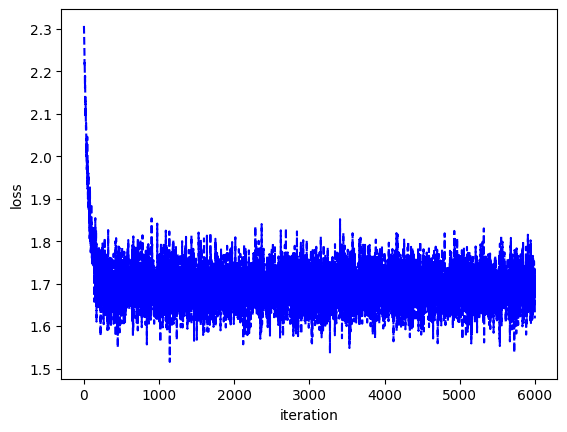

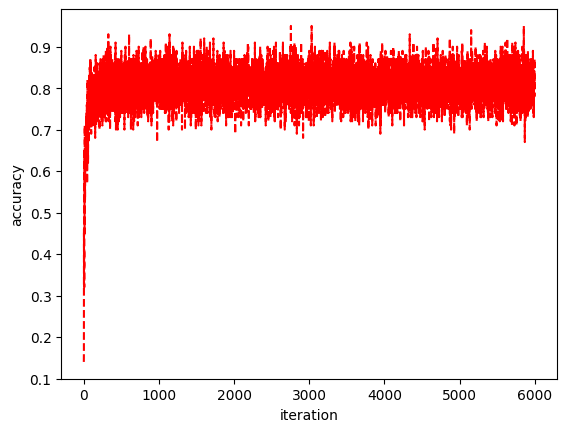

In [8]:
# training loss curve
plt.figure()
plt.plot(loss_set, 'b--')
plt.xlabel('iteration')
plt.ylabel('loss')
# training accuracy curve
plt.figure()
plt.plot(accu_set, 'r--')
plt.xlabel('iteration')
plt.ylabel('accuracy')

### You have finished homework1, congratulations!